# Klasifikasi menggunakan MLP

Notebook ini merupakan bagian dari buku **Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **BAB XII - MULTILAYER PERCEPTRON**

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import resample

In [2]:
epochs = 10
batch_size = 32
random_seed = 42

np.random.seed(random_seed)
tf.random.set_seed(random_seed)

## Data Understanding

In [3]:
# Membaca file CSV
df = pd.read_csv(r'../datasets/breast-cancer-wisconsin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         699 non-null    int64 
 1   thickness  699 non-null    int64 
 2   size       699 non-null    int64 
 3   shape      699 non-null    int64 
 4   adhesion   699 non-null    int64 
 5   cell-size  699 non-null    int64 
 6   nuclei     699 non-null    object
 7   chromatin  699 non-null    int64 
 8   nucleoli   699 non-null    int64 
 9   mitoses    699 non-null    int64 
 10  class      699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
# cari data bukan angka
df[df["nuclei"].apply(lambda x: not x.isnumeric())]

,id,thickness,size,shape,adhesion,cell-size,nuclei,chromatin,nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


<AxesSubplot:>

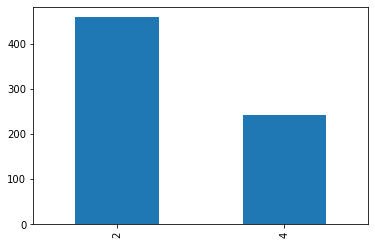

In [5]:
# Melihat target kelas
df["class"].value_counts().plot(kind="bar")

## Data Preparation

In [6]:
# Mengapus kolom yang tidak diperlukan
df = df.drop(["id"], axis=1)

# Menghapus data non-numerik
df = df[df["nuclei"].apply(lambda x: x.isnumeric())]
df["nuclei"] = df["nuclei"].astype("int64")

# Transformasi kelas menjadi teks
df["class"] = df["class"].apply(lambda x: np.where(x == 2,  0, 1))

In [7]:
# Downsampling
df_majority = df[df["class"] == 0]
df_minority = df[df["class"] == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=random_seed)
df = pd.concat([df_majority_downsampled, df_minority])

In [8]:
# Memisahkan 
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
# Membagi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

## Modelling

In [10]:
# Membuat arsitektur model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

2022-03-06 15:43:25.417710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-06 15:43:25.448744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-06 15:43:25.449279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-06 15:43:25.450580: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow wi

In [11]:
# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Lakukan training menggunakan data latih
H = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10


2022-03-06 15:43:26.979950: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


12/12 [==============================] - 1s 14ms/step - loss: 0.7835 - accuracy: 0.4215 - val_loss: 0.6424 - val_accuracy: 0.4479
Epoch 2/10
 1/12 [=>............................] - ETA: 0s - loss: 0.6125 - accuracy: 0.4375

2022-03-06 15:43:28.030681: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


12/12 [==============================] - 0s 6ms/step - loss: 0.5991 - accuracy: 0.5000 - val_loss: 0.5692 - val_accuracy: 0.4792
Epoch 3/10
12/12 [==============================] - 0s 7ms/step - loss: 0.5383 - accuracy: 0.5209 - val_loss: 0.5203 - val_accuracy: 0.5417
Epoch 4/10
12/12 [==============================] - 0s 6ms/step - loss: 0.4971 - accuracy: 0.5838 - val_loss: 0.4907 - val_accuracy: 0.8125
Epoch 5/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4683 - accuracy: 0.7723 - val_loss: 0.4581 - val_accuracy: 0.8958
Epoch 6/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4424 - accuracy: 0.8429 - val_loss: 0.4315 - val_accuracy: 0.8958
Epoch 7/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4211 - accuracy: 0.8796 - val_loss: 0.4119 - val_accuracy: 0.9167
Epoch 8/10
12/12 [==============================] - 0s 5ms/step - loss: 0.4033 - accuracy: 0.8927 - val_loss: 0.3941 - val_accuracy: 0.9271
Epoch 9/10
12/12 [=============

## Evaluation

In [18]:
# Lakukan prediksi 
y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)

In [19]:
# Hitung statistik prediksi
print(classification_report(y_test, y_pred, target_names=["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.94      0.94      0.94        48
   malignant       0.94      0.94      0.94        48

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96



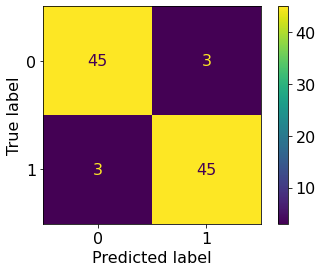

In [22]:
# Tampilkan confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

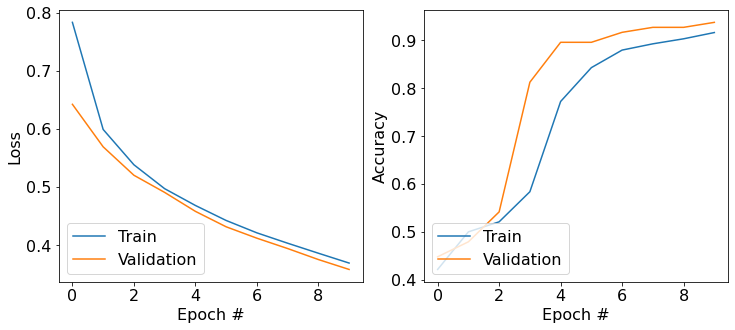

In [27]:
# Tampilkan statistik training model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(H.history["loss"], label="Train")
ax1.plot(H.history["val_loss"], label="Validation")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend(loc="lower left")

ax2.plot(H.history["accuracy"], label="Train")
ax2.plot(H.history["val_accuracy"], label="Validation")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower left")

In [17]:
# Melakukan prediksi
data_pred = [[8, 4, 5, 1, 2, 1, 7, 3, 1]]
model.predict(data_pred)

array([[0.5155118]], dtype=float32)